<a href="https://colab.research.google.com/github/mlnrengga/ML_Semester5/blob/main/JS4/2341720160_Maulana%20Rengga%20Ramadan_KUIS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Maulana Rengga Ramadan**

**NIM: 2341720160**

**Kelas: TI-3G**


# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [433]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [434]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [435]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [436]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [437]:
# Data Size
df.shape

(48842, 15)

In [438]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [439]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan


In [440]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1. Lakukan inspeksi profile data

In [441]:
df.shape

(48842, 15)

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [443]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


##2. Variabel apa yang memiliki nilai yang hilang (missing value) dan berapa jumlahnya?

In [444]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [445]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

## 1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang

In [446]:
df['workclass'].fillna(value=df['workclass'].mode, inplace=True)
df['occupation'].fillna(value=df['occupation'].mode, inplace=True)
df['native-country'].fillna(value=df['native-country'].mode, inplace=True)

## 2. Cek kembali apakah masih terdapat data yang hilang

In [447]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [448]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    top_categories = df[col].value_counts().index[:5]

    df[col] = df[col].apply(
        lambda x: x if x in top_categories and pd.notnull(x) and x not in ['?', '', 'None']
        else 'Others'
    )

df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Others,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,Others,7,Married-civ-spouse,Others,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Others,<=50K


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

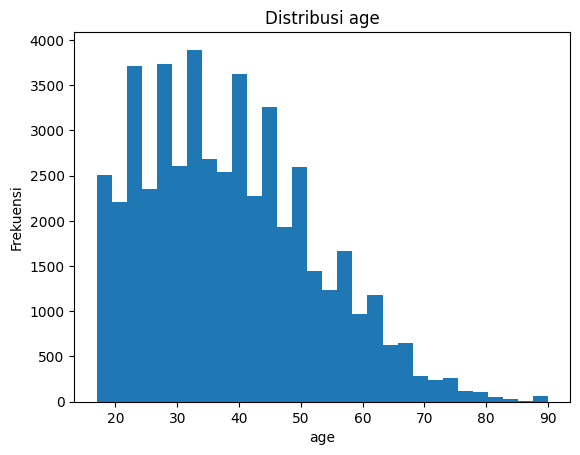

In [449]:
# Jawab 1.1 - Histrogram
num_cols = ['age']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col); plt.ylabel('Frekuensi')
    plt.show()

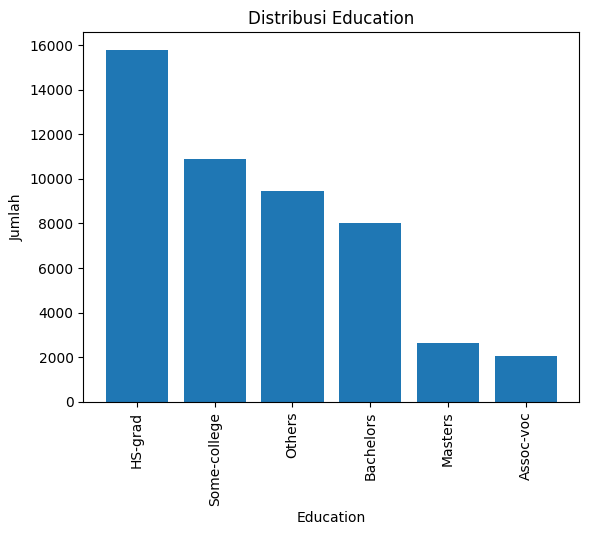

In [450]:
# Jawab 1.2 - Barchart
plt.figure()

edu_counts = df['education'].value_counts()

plt.bar(edu_counts.index, edu_counts.values)

plt.title('Distribusi Education')
plt.xlabel('Education')
plt.ylabel('Jumlah')

plt.xticks(rotation=90)

plt.show()

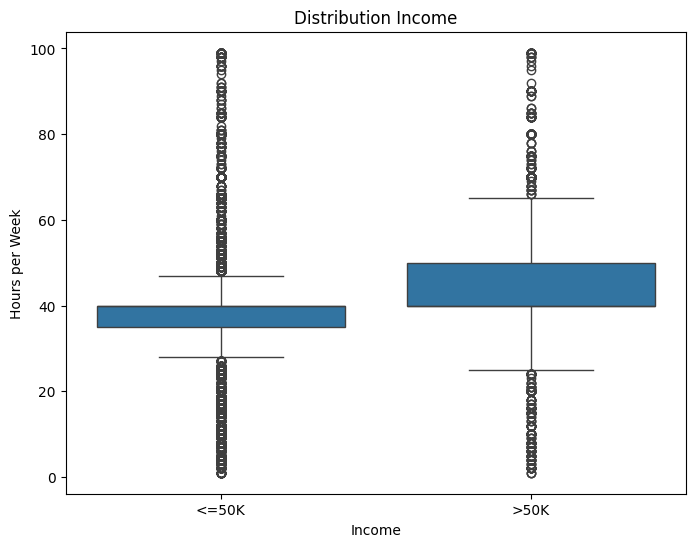

In [451]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Distribution Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

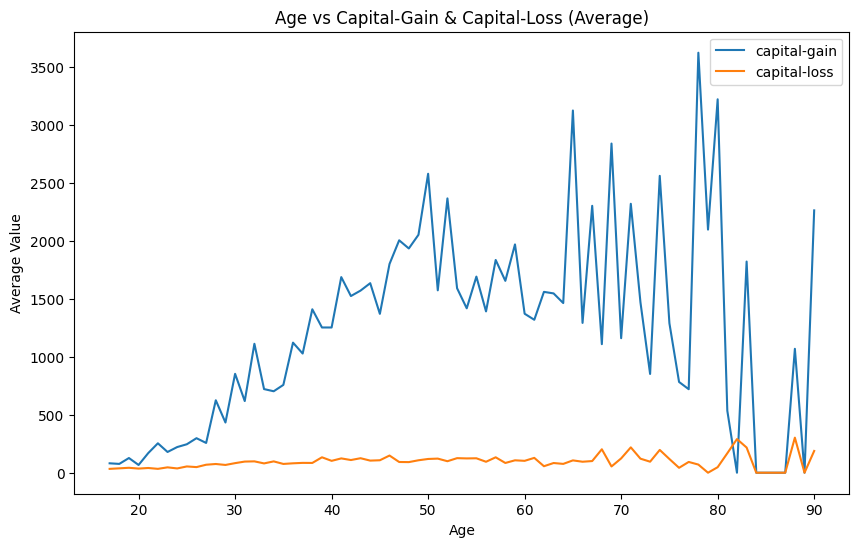

In [452]:
# Jawab 1.4 - Lineplot
avg = df.groupby('age')[['capital-gain','capital-loss']].mean()

avg.plot(kind='line', figsize=(10,6))
plt.title('Age vs Capital-Gain & Capital-Loss (Average)')
plt.xlabel('Age')
plt.ylabel('Average Value')
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [453]:
# Jawab dengan komentar python

'''
  Bisa dengan multiple comment
  seperti ini
'''
'''
  1. Distribusi age menumpuk pada usia 20–50 tahun lalu menurun di usia lanjut, sehingga cenderung condong ke kiri.
'''
'''
  2. Jika ada data hilang pada age, saya isi dengan median karena lebih mewakili pusat data dan tidak terpengaruh outlier
'''

'''
  3.
'''
outlier_counts = {}

for cat in df['income'].unique():
    data = df[df['income'] == cat]['hours-per-week']
    Q1, Q3 = data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outlier_counts[cat] = ((data < lower) | (data > upper)).sum()

print(outlier_counts)
print("Kategori dengan outlier terbanyak:", max(outlier_counts, key=outlier_counts.get))

{'<=50K': np.int64(11706), '>50K': np.int64(781)}
Kategori dengan outlier terbanyak: <=50K


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [454]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Others,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,Others,7,Married-civ-spouse,Others,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Others,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

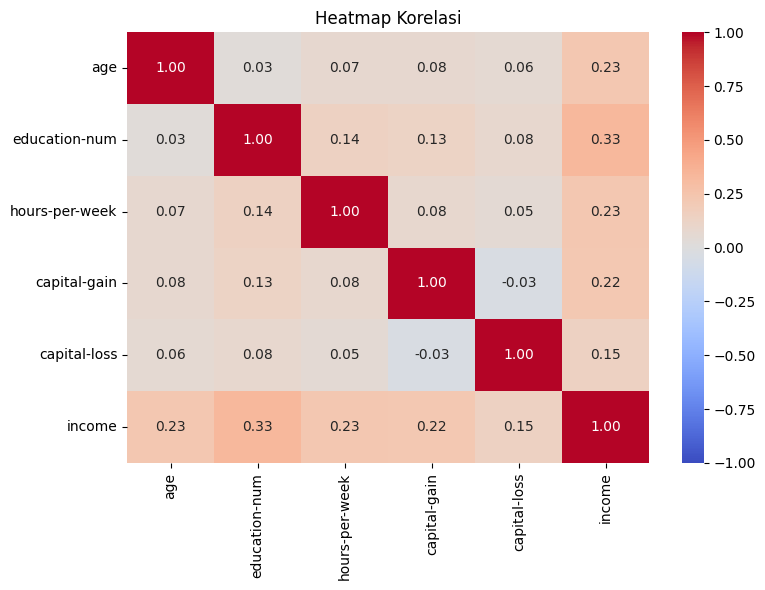

In [455]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
num_only = df[cols]

# Hitung korelasi
corr = num_only.corr(numeric_only=True)

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap Korelasi')
plt.tight_layout()
plt.show()

In [456]:
# Hasil analisis jelaskan pada cell ini
'''
  2. Korelasi menunjukkan bahwa education-num, hours-per-week, dan capital-gain punya hubungan positif cukup kuat dengan income. Variabel age berhubungan lemah, sedangkan capital-loss hampir tidak berpengaruh.
'''

'\n  2. Korelasi menunjukkan bahwa education-num, hours-per-week, dan capital-gain punya hubungan positif cukup kuat dengan income. Variabel age berhubungan lemah, sedangkan capital-loss hampir tidak berpengaruh.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [457]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


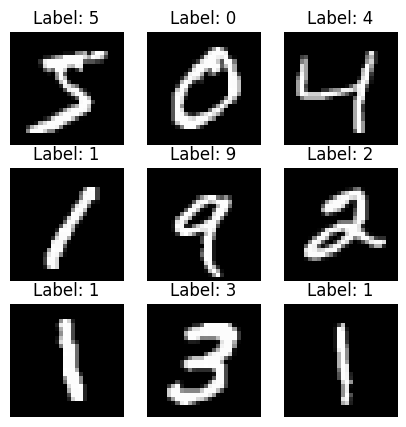

In [458]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [459]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

## 1. Lakukan proses upsampling citra menjadi ukuran 32x32

Bentuk data asli: (10000, 28, 28)
Bentuk data setelah upsampling (32x32): (10000, 32, 32)


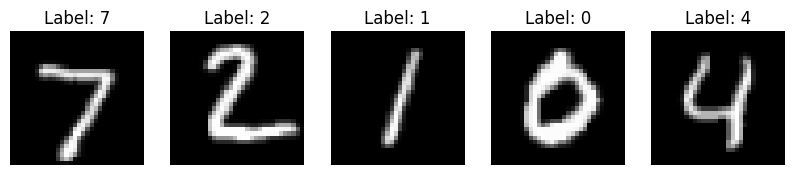

In [460]:
import cv2
from skimage.transform import resize
X_test_upsampled = np.array([resize(img, (32, 32), anti_aliasing=True) for img in X_test])

print("Bentuk data asli:", X_test.shape)
print("Bentuk data setelah upsampling (32x32):", X_test_upsampled.shape)

# Tampilkan 5 contoh hasil
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Sebelum normalisasi: min = 0.0 , max = 1.0
Sesudah normalisasi: min = 0.0 , max = 0.00392156862745098


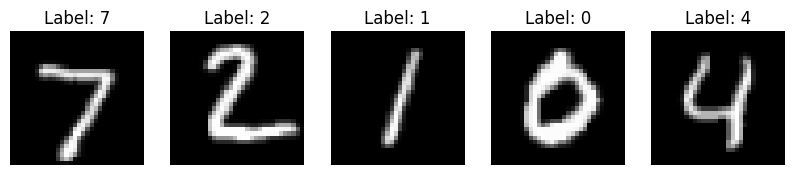

In [461]:


# Normalisasi semua data test hasil upsampling
X_test_normalisasi = X_test_upsampled / 255.0

print("Sebelum normalisasi: min =", X_test_upsampled.min(), ", max =", X_test_upsampled.max())
print("Sesudah normalisasi: min =", X_test_normalisasi.min(), ", max =", X_test_normalisasi.max())

# Tampilkan 5 contoh hasil normalisasi
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_normalisasi[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [462]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

num_samples = X_test_normalisasi.shape[0]

X_test_flat = np.zeros((num_samples, 32*32), dtype=np.float32)

for i in range(num_samples):
    X_test_flat[i] = X_test_normalisasi[i].flatten()

print("Bentuk data setelah diubah menjadi array 1 dimensi:", X_test_flat.shape)
print("Contoh vektor citra (10 elemen pertama):", X_test_flat[0][:10])

Bentuk data setelah diubah menjadi array 1 dimensi: (10000, 1024)
Contoh vektor citra (10 elemen pertama): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
